In [2]:
import pandas as pd 
import matplotlib.pyplot as plt


In [46]:
data = pd.read_csv("sh_sea_ice_extent_daily.csv")

In [30]:
df.columns

Index(['month', 'data', 'month_date', '2020', '2021', '2022', '2023', '2024',
       '1981-2010 median', '1981-2010 mean'],
      dtype='object')

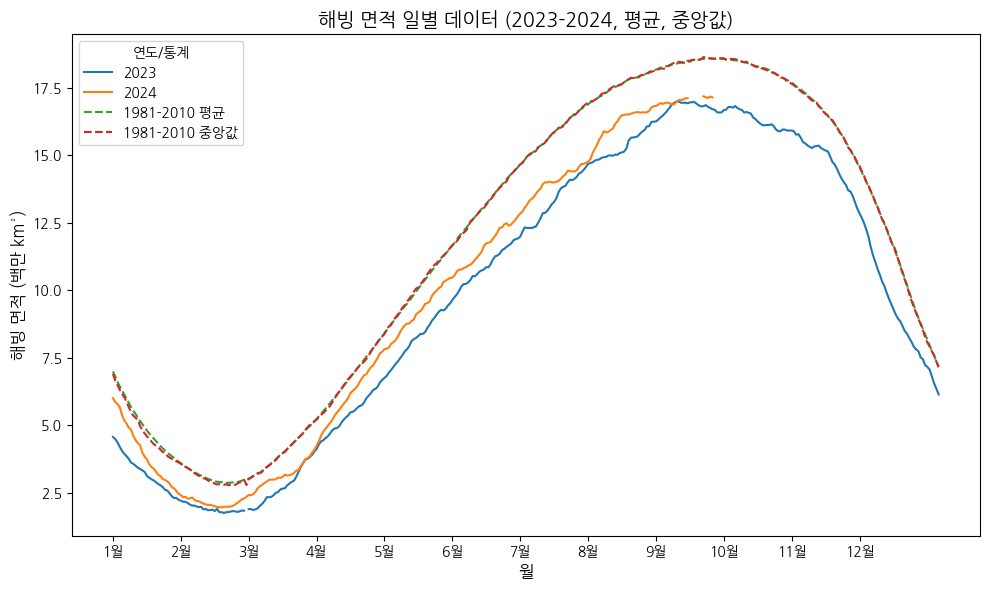

In [66]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Register Nanum Gothic font
font_path = 'C:/Users/YTN/Downloads/Nanum_Gothic/NanumGothic-Regular.ttf'  # Full path to Nanum Gothic Regular font
font_manager.fontManager.addfont(font_path)  # Register the font
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)  # Set the font for use in the plot

# Select years to plot
selected_years = ['2023', '2024']

# Extract the date column
date = data['month_date']

# Korean month names
abbreviated_months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

# Calculate appropriate tick positions
tick_positions = [i for i in range(0, len(date), len(date)//12)]
tick_positions = tick_positions[:len(abbreviated_months)]  # Adjust number of ticks

# Plot the chart for 2023, 2024, mean, and median
plt.figure(figsize=(10,6))

# Plot the data for 2023 and 2024
for year in selected_years:
    plt.plot(date, data[year], label=year)

# Also plot the mean and median
plt.plot(date, data['1981-2010 mean'], label='1981-2010 평균', linestyle='--')
plt.plot(date, data['1981-2010 median'], label='1981-2010 중앙값', linestyle='--')

# Set custom ticks for the x-axis with Korean month names
plt.xticks(ticks=tick_positions, labels=abbreviated_months)

# Customize the plot with Korean labels
plt.title('해빙 면적 일별 데이터 (2023-2024, 평균, 중앙값)', fontsize=14)
plt.xlabel('월', fontsize=12)
plt.ylabel('해빙 면적 (백만 km²)', fontsize=12)
plt.legend(title="연도/통계", fontsize=10)
plt.tight_layout()

# Save and display the plot
plt.savefig('sea_ice_extent_2023_2024_korean.png', dpi=300)
plt.show()


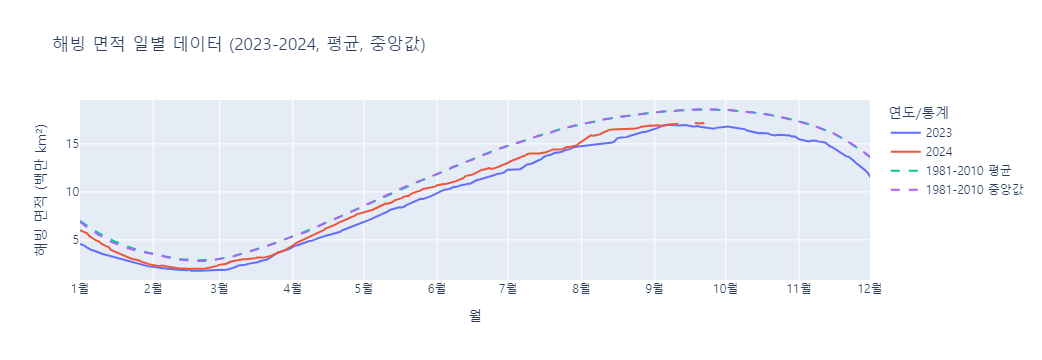

In [130]:
import plotly.graph_objects as go
import pandas as pd
from matplotlib import font_manager, rc

# Register Nanum Gothic font
font_path = 'C:/Users/YTN/Downloads/Nanum_Gothic/NanumGothic-Regular.ttf'
font_manager.fontManager.addfont(font_path)
font_name = font_manager.FontProperties(fname=font_path).get_name()

# Load the data, ensure the 'month_date' column is parsed correctly
data = pd.read_csv("sh_sea_ice_extent_daily.csv")

# Combine the 'month_date' column with a dummy year (2023) to ensure it can be parsed as datetime
data['month_date_fixed'] = '2023 ' + data['month_date']  # Add year to the dates

# Now parse the combined date string into a valid datetime format
data['month_date_fixed'] = pd.to_datetime(data['month_date_fixed'], format='%Y %B %d', errors='coerce')

# Drop any NaT values
data = data.dropna(subset=['month_date_fixed'])  # Drop NaT values

# Assign the valid date column for plotting
date = data['month_date_fixed']

# Korean month names
abbreviated_months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

# Create the Plotly figure
fig = go.Figure()

# Add traces for each year (2023 and 2024)
for year in ['2023', '2024']:
    fig.add_trace(go.Scatter(
        x=date, 
        y=data[year], 
        mode='lines',
        name=f'{year}',
        line=dict(width=2)
    ))

# Add traces for mean and median
fig.add_trace(go.Scatter(
    x=date, 
    y=data['1981-2010 mean'], 
    mode='lines', 
    name='1981-2010 평균', 
    line=dict(dash='dash')
))

fig.add_trace(go.Scatter(
    x=date, 
    y=data['1981-2010 median'], 
    mode='lines', 
    name='1981-2010 중앙값', 
    line=dict(dash='dash')
))

# Set tick values to the first day of each month
tickvals = pd.date_range(start=date.min(), end=date.max(), freq='MS')  # 'MS' = Month Start

# Update layout to include Korean labels and a title
fig.update_layout(
    title='해빙 면적 일별 데이터 (2023-2024, 평균, 중앙값)',
    xaxis_title='월',
    yaxis_title='해빙 면적 (백만 km²)',
    xaxis=dict(
        tickvals=tickvals,  # Set tick values to start of each month
        ticktext=abbreviated_months[:len(tickvals)],  # Label ticks with Korean month names
        range=[tickvals[0], tickvals[-1]]  # Adjust the range to exclude specific dates like Dec 26
    ),
    font=dict(family=font_name, size=12),
    legend_title_text='연도/통계',
    hovermode='x unified'
)

# Show the plot
fig.show()

# Optionally, save the plot as an HTML file
fig.write_html('sea_ice_extent_2023_2024_plotly_fixed.html')
